In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Problem Statement 7: (Process the relevant data)
# In the given data The total number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise, etc. 
# seem to be in percentage terms and not in absolute terms.

# The total number of households in a district can be found in the census data. 
# Take the information from the census data and find the absolute values for the Total Number of Dilapidated, 
# and Latrine_premise for both rural and urban areas of each district.

# Calculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder, 
# such that it has the following column names:

In [7]:
# new_names = {"PONDICHERRY" : "Puducherry",
# "ORISSA" : "Odisha",
# "NCT OF DELHI" : "Delhi"}
new_names = {'PONDICHERRY': 'PUDUCHERRY', 'ORISSA': 'ODISHA', 'NCT OF DELHI': 'DELHI'}

In [2]:
cols_h =  ["District Name",
"Rural/Urban",
"Total Number of households",
"Total Number of Livable",
"Total Number of Dilapidated",
"Latrine_premise",
"State Name"
]

new_cols =["District",
"Households_Rural",
"Households_Rural_Livable",
"Households_Rural_Dilapidated",
"Households_Rural_Toilet_Premise",
"Households_Urban",
"Households_Urban_Livable",
"Households_Urban_Dilapidated",
"Households_Urban_Toilet_Premise"]

In [4]:
df_housing = pd.read_csv('Data/housing.csv',usecols=cols_h)
df_housing.head()

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,JAMMU & KASHMIR,Kupwara,Rural,100,58.1,8.3,48.9
1,JAMMU & KASHMIR,Kupwara,Total,100,57.3,7.9,50.9
2,JAMMU & KASHMIR,Kupwara,Urban,100,49.5,4.8,70.2
3,JAMMU & KASHMIR,Badgam,Rural,100,46.3,3.9,83.3
4,JAMMU & KASHMIR,Badgam,Total,100,44.7,3.8,84.3


In [5]:
df_housing['State Name'] = df_housing['State Name'].apply(lambda x: x.replace('&', 'AND'))
df_housing.head()

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,JAMMU AND KASHMIR,Kupwara,Rural,100,58.1,8.3,48.9
1,JAMMU AND KASHMIR,Kupwara,Total,100,57.3,7.9,50.9
2,JAMMU AND KASHMIR,Kupwara,Urban,100,49.5,4.8,70.2
3,JAMMU AND KASHMIR,Badgam,Rural,100,46.3,3.9,83.3
4,JAMMU AND KASHMIR,Badgam,Total,100,44.7,3.8,84.3


In [8]:
# updating the state names in housing data
df_housing['State Name'] = df_housing.apply(lambda x: new_names[x['State Name']] if x['State Name'].upper() in new_names.keys()
                                    else x['State Name'], axis=1)

In [9]:
df_housing.iloc[[200,300,400,500],:]

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
200,UTTARAKHAND,Hardwar,Total,100,39.4,4.1,66.6
300,RAJASTHAN,Churu,Total,100,36.8,4.9,57.8
400,UTTAR PRADESH,Moradabad,Urban,100,46.2,3.2,93.6
500,UTTAR PRADESH,Mahoba,Rural,100,50.7,1.7,17.8


In [11]:
# reading census data
df_census = pd.read_csv('Data/census_2011.csv')
df_census.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0


In [12]:
df_dist_pop = df_census[['District name','Population','Rural_Households','Urban_Households','State name']]
df_dist_pop.head()

,District name,Population,Rural_Households,Urban_Households,State name
0,Kupwara,870354.0,158438.0,NaN,JAMMU AND KASHMIR
1,Badgam,753745.0,160649.0,27190.0,JAMMU AND KASHMIR
2,Leh(Ladakh),133487.0,36920.0,17474.0,JAMMU AND KASHMIR
3,Kargil,140802.0,40370.0,7774.0,JAMMU AND KASHMIR
4,Punch,NaN,132139.0,15269.0,JAMMU AND KASHMIR


In [13]:
# updating the state names in df derived from census data
df_dist_pop['State name'] =  df_dist_pop.apply(lambda x: new_names[x['State name']] if x['State name'].upper() in new_names.keys()
                                    else x['State name'], axis=1)

C:\Users\miles\AppData\Local\Temp\ipykernel_12648\3869760908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist_pop['State name'] =  df_dist_pop.apply(lambda x: new_names[x['State name']] if x['State name'].upper() in new_names.keys()


In [14]:
df_dist_pop.isna().sum()

District name        0
Population          30
Rural_Households    42
Urban_Households    33
State name           0
dtype: int64

In [15]:
df_dist_pop = df_dist_pop.fillna(0)
df_dist_pop.head()

,District name,Population,Rural_Households,Urban_Households,State name
0,Kupwara,870354.0,158438.0,0.0,JAMMU AND KASHMIR
1,Badgam,753745.0,160649.0,27190.0,JAMMU AND KASHMIR
2,Leh(Ladakh),133487.0,36920.0,17474.0,JAMMU AND KASHMIR
3,Kargil,140802.0,40370.0,7774.0,JAMMU AND KASHMIR
4,Punch,0.0,132139.0,15269.0,JAMMU AND KASHMIR


In [16]:
df_dist_pop[(df_dist_pop['Population'] == 0) & (df_dist_pop['Rural_Households'] == 0) & (df_dist_pop['Urban_Households'] == 0)]

,District name,Population,Rural_Households,Urban_Households,State name
460,Anuppur,0.0,0.0,0.0,MADHYA PRADESH


In [17]:
# calculating population from rual and urban households values
df_dist_pop['Population'] = df_dist_pop.apply(lambda x: x['Rural_Households']+x['Urban_Households'] if not x['Population']
                            else x['Population'], axis=1)

# calculating rural households from total population and urban households values
df_dist_pop['Rural_Households'] = df_dist_pop.apply(lambda x: x['Population'] - x['Urban_Households'] if not x['Rural_Households']
                            else x['Rural_Households'], axis=1)

# calculating urban households from total population and rural poplation
df_dist_pop['Urban_Households'] = df_dist_pop.apply(lambda x: x['Population'] - x['Rural_Households'] if not x['Urban_Households']
                            else x['Urban_Households'], axis=1)

In [18]:
df_housing['District Name'].nunique(),df_dist_pop['District name'].nunique()

(634, 634)

In [19]:
df_dist_pop.head()

,District name,Population,Rural_Households,Urban_Households,State name
0,Kupwara,870354.0,158438.0,711916.0,JAMMU AND KASHMIR
1,Badgam,753745.0,160649.0,27190.0,JAMMU AND KASHMIR
2,Leh(Ladakh),133487.0,36920.0,17474.0,JAMMU AND KASHMIR
3,Kargil,140802.0,40370.0,7774.0,JAMMU AND KASHMIR
4,Punch,147408.0,132139.0,15269.0,JAMMU AND KASHMIR


In [20]:
# df_housing['Total_households'] 
# df_housing.apply(lambda x: df_dist_pop[df_dist_pop['District name']==x['District Name']]['Population'], axis=1)
total_pop = []
livable = []
dilapidated = []
latrine_prem = []
# "Total Number of households"	"Total Number of Livable"	"Total Number of Dilapidated"	"Latrine_premise"

ru = {'Rural':'Rural_Households', 'Urban':'Urban_Households', 'Total':'Population'}
stats_not_in_census = set()
for i in range(df_housing.shape[0]): #[['District Name','State Name']]:
    d = df_housing['District Name'][i]
    s = df_housing['State Name'][i]
    ur = df_housing['Rural/Urban'][i]

    temp = df_dist_pop[(df_dist_pop['District name']==d) & (df_dist_pop['State name']==s)]
    

    if len(temp) > 0:
        # tpop = temp[ru[ur]].iloc[0]
        total_pop.append(temp[ru[ur]].iloc[0])
        livable.append(temp[ru[ur]].iloc[0] * df_housing['Total Number of Livable'][i] / 100)
        dilapidated.append(temp[ru[ur]].iloc[0] * df_housing['Total Number of Dilapidated'][i] / 100)
        latrine_prem.append(temp[ru[ur]].iloc[0] * df_housing['Latrine_premise'][i] / 100)
    else:
        total_pop.append(0)
        livable.append(0)
        dilapidated.append(0)
        latrine_prem.append(0)
        stats_not_in_census.add(df_housing['District Name'][i])

In [21]:
len(stats_not_in_census)

5

In [22]:
df_housing['Total_population'] = total_pop
df_housing["Livablle_value"] = livable
df_housing["Dilapidated_value"] = dilapidated
df_housing['Latrine_prem_value'] = latrine_prem
df_housing.head()

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise,Total_population,Livablle_value,Dilapidated_value,Latrine_prem_value
0,JAMMU AND KASHMIR,Kupwara,Rural,100,58.1,8.3,48.9,158438.0,92052.478,13150.354,77476.182
1,JAMMU AND KASHMIR,Kupwara,Total,100,57.3,7.9,50.9,870354.0,498712.842,68757.966,443010.186
2,JAMMU AND KASHMIR,Kupwara,Urban,100,49.5,4.8,70.2,711916.0,352398.420,34171.968,499765.032
3,JAMMU AND KASHMIR,Badgam,Rural,100,46.3,3.9,83.3,160649.0,74380.487,6265.311,133820.617
4,JAMMU AND KASHMIR,Badgam,Total,100,44.7,3.8,84.3,753745.0,336924.015,28642.310,635407.035


In [ ]:
# Problem Statement 8: (Visualise the housing data)
# Visualize the following data for each state using appropriate methods:
# Number of households for 100 people
# Percentage of households that have toilet(s) in premise to the total number of households.
# Urban to rural population ratio.

In [25]:
df_housing_all = pd.read_csv("Data/housing.csv")
df_housing_all.head(3)

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,100,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7


In [26]:
# Percentage of households that have toilet(s) in premise to the total number of households.
# c100,Number of households not having latrine facility within the premises

# taking required cols and creating a temp dataframe
df_hs_temp = df_housing_all.iloc[:,[1,3,9,99]]

# adding population colm
df_hs_temp['Population'] = total_pop
df_hs_temp.head()

C:\Users\miles\AppData\Local\Temp\ipykernel_12648\1397786122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hs_temp['Population'] = total_pop


,State Name,District Name,Rural/Urban,H_latrine_premoses,Population
0,JAMMU & KASHMIR,Kupwara,Rural,51.1,158438.0
1,JAMMU & KASHMIR,Kupwara,Total,49.1,870354.0
2,JAMMU & KASHMIR,Kupwara,Urban,29.8,711916.0
3,JAMMU & KASHMIR,Badgam,Rural,16.7,160649.0
4,JAMMU & KASHMIR,Badgam,Total,15.7,753745.0


In [27]:
# total pop = rural pop + urban pop
# for every district taking only row corresponds to 'total' under Rural/Urban
df_hs_temp =  df_hs_temp[df_hs_temp['Rural/Urban'] == 'Total']
df_hs_temp.head()

,State Name,District Name,Rural/Urban,H_latrine_premoses,Population
1,JAMMU & KASHMIR,Kupwara,Total,49.1,870354.0
4,JAMMU & KASHMIR,Badgam,Total,15.7,753745.0
7,JAMMU & KASHMIR,Leh(Ladakh),Total,9.6,133487.0
10,JAMMU & KASHMIR,Kargil,Total,3.1,140802.0
13,JAMMU & KASHMIR,Punch,Total,81.3,147408.0


In [28]:
# finding the actual values for h_latrine_premoses using population - pop who has no on premises toilets

df_hs_temp['H_latrine_premoses_values'] = df_hs_temp.apply(lambda x: round(x['H_latrine_premoses']*x['Population']/100), axis=1)
df_hs_temp.head()

,State Name,District Name,Rural/Urban,H_latrine_premoses,Population,H_latrine_premoses_values
1,JAMMU & KASHMIR,Kupwara,Total,49.1,870354.0,427344
4,JAMMU & KASHMIR,Badgam,Total,15.7,753745.0,118338
7,JAMMU & KASHMIR,Leh(Ladakh),Total,9.6,133487.0,12815
10,JAMMU & KASHMIR,Kargil,Total,3.1,140802.0,4365
13,JAMMU & KASHMIR,Punch,Total,81.3,147408.0,119843


In [29]:
# finding values for new col - T_on_premises - pop who has on premises toilets
df_hs_temp['T_On_premises'] = df_hs_temp.apply(lambda x: round((100-x['H_latrine_premoses'])*x['Population']/100), axis=1)
df_hs_temp.head(3)

,State Name,District Name,Rural/Urban,H_latrine_premoses,Population,H_latrine_premoses_values,T_On_premises
1,JAMMU & KASHMIR,Kupwara,Total,49.1,870354.0,427344,443010
4,JAMMU & KASHMIR,Badgam,Total,15.7,753745.0,118338,635407
7,JAMMU & KASHMIR,Leh(Ladakh),Total,9.6,133487.0,12815,120672


In [30]:
df_hs_temp['Population'].sum(),df_hs_temp['T_On_premises'].sum()

(1150935278.0, 523796533)

In [31]:
# sum of population and T_on_premises(toilets on premises) group by state name
df_hs_st = df_hs_temp.groupby('State Name').sum(['Populations','T_On_premises'])
df_hs_st

,H_latrine_premoses,Population,H_latrine_premoses_values,T_On_premises
State Name,,,,
ANDAMAN & NICOBAR ISLANDS,92.5,122374.0,25597,96777
ANDHRA PRADESH,1218.0,81539713.0,41892976,39646737
ARUNACHAL PRADESH,654.0,1311346.0,471815,839531
ASSAM,1013.1,29376658.0,10398018,18978640
BIHAR,2936.4,101925629.0,78041454,23884175
CHANDIGARH,12.4,1055450.0,130876,924574
CHHATTISGARH,1424.6,25545198.0,19230506,6314692
DADRA & NAGAR HAVELI,45.3,0.0,0,0
DAMAN & DIU,58.8,243247.0,55100,188147


<Axes: xlabel='State Name'>

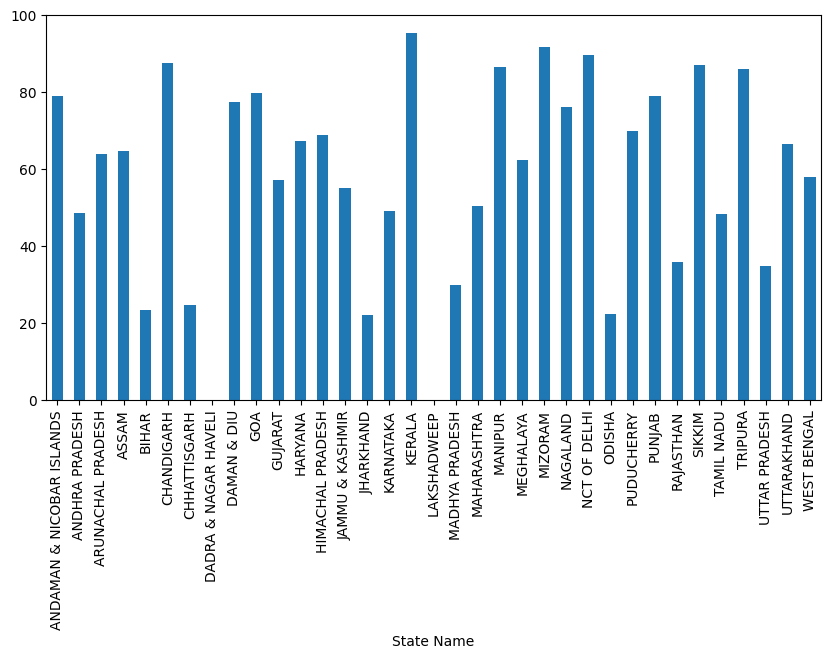

In [32]:
# ploting population percentage for each state who has toilets on premises
df_hs_st.apply(lambda x: round(x['T_On_premises']/x['Population'] * 100,2) if x['Population']>0 
                                                else 0, axis=1).plot(kind='bar',layout=[12,24],figsize=(10,5))

In [ ]:
# Visualize the following data for each state using appropriate methods:
# Urban to rural population ratio.

In [33]:
df_dist_pop.head()

,District name,Population,Rural_Households,Urban_Households,State name
0,Kupwara,870354.0,158438.0,711916.0,JAMMU AND KASHMIR
1,Badgam,753745.0,160649.0,27190.0,JAMMU AND KASHMIR
2,Leh(Ladakh),133487.0,36920.0,17474.0,JAMMU AND KASHMIR
3,Kargil,140802.0,40370.0,7774.0,JAMMU AND KASHMIR
4,Punch,147408.0,132139.0,15269.0,JAMMU AND KASHMIR


In [34]:
df_dist_pop.apply(lambda x: x['Population'] - x['Rural_Households'] + x['Urban_Households'], axis=1)

0      1423832.0
1       620286.0
2       114041.0
3       108206.0
4        30538.0
         ...    
635      24220.0
636     198319.0
637      41768.0
638      67600.0
639     101262.0
Length: 640, dtype: float64

C:\Users\miles\AppData\Local\Temp\ipykernel_12648\3598497247.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dist_pop.groupby('State name').sum().apply(lambda x: x['Urban_Households']/x['Rural_Households'], axis=1).plot(kind='bar')


<Axes: xlabel='State name'>

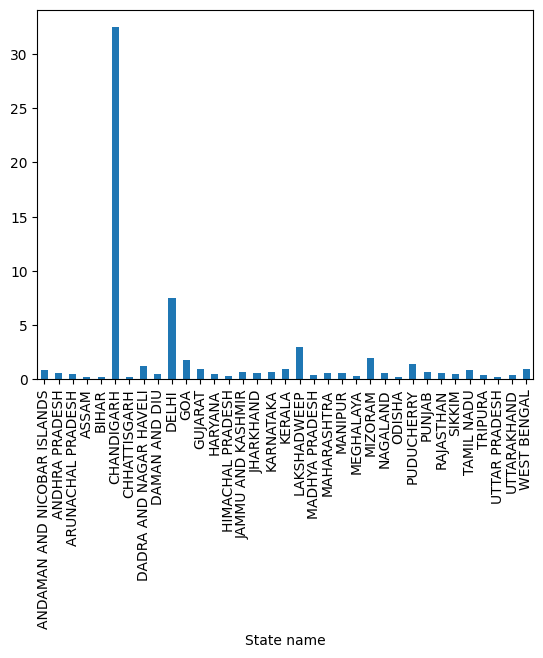

In [35]:
# Urban to rural population ratio.
df_dist_pop.groupby('State name').sum().apply(lambda x: x['Urban_Households']/x['Rural_Households'], axis=1).plot(kind='bar')

C:\Users\miles\AppData\Local\Temp\ipykernel_12648\2020837676.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dist_pop[df_dist_pop['State name'] != 'CHANDIGARH'].groupby('State name').sum().apply(lambda x: x['Urban_Households']/x['Rural_Households'], axis=1).plot(kind='bar')


<Axes: xlabel='State name'>

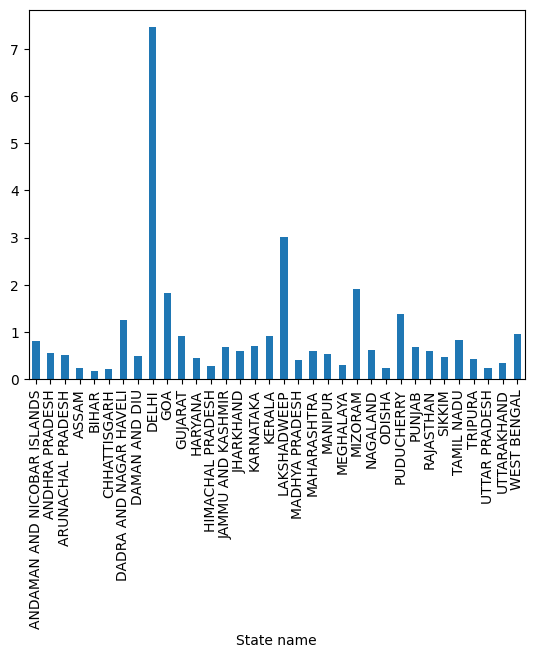

In [36]:
# Urban to rural population ratio. with out chandigarh
df_dist_pop[df_dist_pop['State name'] != 'CHANDIGARH'].groupby('State name').sum().apply(lambda x: x['Urban_Households']/x['Rural_Households'], axis=1).plot(kind='bar')